# Image features exercise
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. For more details see the [assignments page](http://vision.stanford.edu/teaching/cs231n/assignments.html) on the course website.*

We have seen that we can achieve reasonable performance on an image classification task by training a linear classifier on the pixels of the input image. In this exercise we will show that we can improve our classification performance by training linear classifiers not on raw pixels but on features that are computed from the raw pixels.

All of your work for this exercise will be done in this notebook.

In [1]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Load data
Similar to previous exercises, we will load CIFAR-10 data from disk.

In [2]:
from cs231n.features import color_histogram_hsv, hog_feature

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'

    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
    
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]
    
    return X_train, y_train, X_val, y_val, X_test, y_test

# Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()

## Extract Features
For each image we will compute a Histogram of Oriented
Gradients (HOG) as well as a color histogram using the hue channel in HSV
color space. We form our final feature vector for each image by concatenating
the HOG and color histogram feature vectors.

Roughly speaking, HOG should capture the texture of the image while ignoring
color information, and the color histogram represents the color of the input
image while ignoring texture. As a result, we expect that using both together
ought to work better than using either alone. Verifying this assumption would
be a good thing to try for your interests.

The `hog_feature` and `color_histogram_hsv` functions both operate on a single
image and return a feature vector for that image. The extract_features
function takes a set of images and a list of feature functions and evaluates
each feature function on each image, storing the results in a matrix where
each column is the concatenation of all feature vectors for a single image.

In [3]:
from cs231n.features import *

num_color_bins = 10 # Number of bins in the color histogram
feature_fns = [hog_feature, lambda img: color_histogram_hsv(img, nbin=num_color_bins)]
X_train_feats = extract_features(X_train, feature_fns, verbose=True)
X_val_feats = extract_features(X_val, feature_fns)
X_test_feats = extract_features(X_test, feature_fns)

# Preprocessing: Subtract the mean feature
mean_feat = np.mean(X_train_feats, axis=0, keepdims=True)
X_train_feats -= mean_feat
X_val_feats -= mean_feat
X_test_feats -= mean_feat

# Preprocessing: Divide by standard deviation. This ensures that each feature
# has roughly the same scale.
std_feat = np.std(X_train_feats, axis=0, keepdims=True)
X_train_feats /= std_feat
X_val_feats /= std_feat
X_test_feats /= std_feat

# Preprocessing: Add a bias dimension
X_train_feats = np.hstack([X_train_feats, np.ones((X_train_feats.shape[0], 1))])
X_val_feats = np.hstack([X_val_feats, np.ones((X_val_feats.shape[0], 1))])
X_test_feats = np.hstack([X_test_feats, np.ones((X_test_feats.shape[0], 1))])

Done extracting features for 1000 / 49000 images
Done extracting features for 2000 / 49000 images
Done extracting features for 3000 / 49000 images
Done extracting features for 4000 / 49000 images
Done extracting features for 5000 / 49000 images
Done extracting features for 6000 / 49000 images
Done extracting features for 7000 / 49000 images
Done extracting features for 8000 / 49000 images
Done extracting features for 9000 / 49000 images
Done extracting features for 10000 / 49000 images
Done extracting features for 11000 / 49000 images
Done extracting features for 12000 / 49000 images
Done extracting features for 13000 / 49000 images
Done extracting features for 14000 / 49000 images
Done extracting features for 15000 / 49000 images
Done extracting features for 16000 / 49000 images
Done extracting features for 17000 / 49000 images
Done extracting features for 18000 / 49000 images
Done extracting features for 19000 / 49000 images
Done extracting features for 20000 / 49000 images
Done extr

## Train SVM on features
Using the multiclass SVM code developed earlier in the assignment, train SVMs on top of the features extracted above; this should achieve better results than training SVMs directly on top of raw pixels.

In [ ]:
# Use the validation set to tune the learning rate and regularization strength

from cs231n.classifiers.linear_classifier import LinearSVM

learning_rates = [1e-9, 1e-8, 1e-7]
regularization_strengths = [5e4, 5e5, 5e6]

results = {}
best_val = -1
best_svm = None

################################################################################
# TODO:                                                                        #
# Use the validation set to set the learning rate and regularization strength. #
# This should be identical to the validation that you did for the SVM; save    #
# the best trained classifer in best_svm. You might also want to play          #
# with different numbers of bins in the color histogram. If you are careful    #
# you should be able to get accuracy of near 0.44 on the validation set.       #
################################################################################

################################################################################
#                              END OF YOUR CODE                                #
################################################################################

# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)

In [ ]:
# Evaluate your trained SVM on the test set
y_test_pred = best_svm.predict(X_test_feats)
test_accuracy = np.mean(y_test == y_test_pred)
print(test_accuracy)

In [ ]:
# An important way to gain intuition about how an algorithm works is to
# visualize the mistakes that it makes. In this visualization, we show examples
# of images that are misclassified by our current system. The first column
# shows images that our system labeled as "plane" but whose true label is
# something other than "plane".

examples_per_class = 8
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for cls, cls_name in enumerate(classes):
    idxs = np.where((y_test != cls) & (y_test_pred == cls))[0]
    idxs = np.random.choice(idxs, examples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, len(classes), i * len(classes) + cls + 1)
        plt.imshow(X_test[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls_name)
plt.show()

### Inline question 1:
Describe the misclassification results that you see. Do they make sense?

## Neural Network on image features
Earlier in this assigment we saw that training a two-layer neural network on raw pixels achieved better classification performance than linear classifiers on raw pixels. In this notebook we have seen that linear classifiers on image features outperform linear classifiers on raw pixels. 

For completeness, we should also try training a neural network on image features. This approach should outperform all previous approaches: you should easily be able to achieve over 55% classification accuracy on the test set; our best model achieves about 60% classification accuracy.

In [4]:
# Preprocessing: Remove the bias dimension
# Make sure to run this cell only ONCE
print(X_train_feats.shape)
X_train_feats = X_train_feats[:, :-1]
X_val_feats = X_val_feats[:, :-1]
X_test_feats = X_test_feats[:, :-1]

print(X_train_feats.shape)

(49000, 155)
(49000, 154)


0.0 %  LR:  0.00025169408660028733   REG:  0.26947992665784465   LRD:  0.973160643118347  Val Acc:  0.105  BEST!!!
1.0 %  LR:  0.0012349055555601167   REG:  0.0009648392138853006   LRD:  0.8320111983914094  Val Acc:  0.078 
2.0 %  LR:  0.0005274329865556731   REG:  0.1253706075593672   LRD:  0.9229988447819676  Val Acc:  0.119  BEST!!!
3.0 %  LR:  0.0009437838292222433   REG:  0.0012086022477786182   LRD:  0.811196250888321  Val Acc:  0.087 
4.0 %  LR:  0.00031928959758952577   REG:  0.007295733108723498   LRD:  0.8777576156156314  Val Acc:  0.105 
5.0 %  LR:  0.007240910106143301   REG:  0.000651449653844781   LRD:  0.8922378170255596  Val Acc:  0.078 
6.0 %  LR:  0.00997970332000438   REG:  0.039070810797045774   LRD:  0.8165769260464889  Val Acc:  0.078 
7.000000000000001 %  LR:  0.0009452943707468001   REG:  0.2480462415450192   LRD:  0.8764495051385499  Val Acc:  0.079 
8.0 %  LR:  0.0008381981240024464   REG:  0.0009959458359003648   LRD:  0.8205147824006775  Val Acc:  0.078 
9.0

74.0 %  LR:  0.00020812739096533715   REG:  0.04778235404761449   LRD:  0.8645077298835575  Val Acc:  0.078 
75.0 %  LR:  0.0002233216672761238   REG:  0.05855828248327082   LRD:  0.8858789821819969  Val Acc:  0.113 
76.0 %  LR:  0.0011999144290889868   REG:  0.0005737795821975821   LRD:  0.808772831765773  Val Acc:  0.087 
77.0 %  LR:  0.0008760893141729193   REG:  0.2576354101346274   LRD:  0.9779181586691768  Val Acc:  0.105 
78.0 %  LR:  0.007344526005204814   REG:  0.11995767478529785   LRD:  0.9481698716119809  Val Acc:  0.119 
79.0 %  LR:  0.0027606349922867307   REG:  0.0013852610996050359   LRD:  0.8028957283670732  Val Acc:  0.107 
80.0 %  LR:  0.0059256401843411   REG:  0.0008394163815015808   LRD:  0.8789878953394239  Val Acc:  0.078 
81.0 %  LR:  0.007552380345120243   REG:  0.00045180876870362267   LRD:  0.9055460871989965  Val Acc:  0.078 
82.0 %  LR:  0.0003766541934747361   REG:  0.002814303092330482   LRD:  0.8949192902089157  Val Acc:  0.087 
83.0 %  LR:  0.000778472

iteration 13800 / 30000: loss 2.302574
iteration 13900 / 30000: loss 2.302648
iteration 14000 / 30000: loss 2.302637
iteration 14100 / 30000: loss 2.302650
iteration 14200 / 30000: loss 2.302624
iteration 14300 / 30000: loss 2.302646
iteration 14400 / 30000: loss 2.302663
iteration 14500 / 30000: loss 2.302590
iteration 14600 / 30000: loss 2.302558
iteration 14700 / 30000: loss 2.302620
iteration 14800 / 30000: loss 2.302671
iteration 14900 / 30000: loss 2.302591
iteration 15000 / 30000: loss 2.302526
iteration 15100 / 30000: loss 2.302651
iteration 15200 / 30000: loss 2.302592
iteration 15300 / 30000: loss 2.302583
iteration 15400 / 30000: loss 2.302710
iteration 15500 / 30000: loss 2.302588
iteration 15600 / 30000: loss 2.302596
iteration 15700 / 30000: loss 2.302617
iteration 15800 / 30000: loss 2.302697
iteration 15900 / 30000: loss 2.302689
iteration 16000 / 30000: loss 2.302572
iteration 16100 / 30000: loss 2.302561
iteration 16200 / 30000: loss 2.302619
iteration 16300 / 30000: 

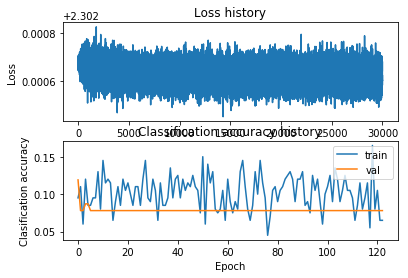

Val Acc:  0.105
Finished!


In [34]:
from cs231n.classifiers.neural_net import TwoLayerNet

input_dim = X_train_feats.shape[1]
hidden_dim = 500
num_classes = 10

best_net = None

################################################################################
# TODO: Train a two-layer neural network on image features. You may want to    #
# cross-validate various parameters as in previous sections. Store your best   #
# model in the best_net variable.                                              #
################################################################################
# Define hyperparameters to tune
# learning_rate = np.linspace(5.5e-4, 5.7e-4, 5) #np.power(10, np.linspace(-2.5, -4, 100))
# learning_rate_decay = np.linspace(.98, .80, 10)
# batch_size = np.linspace(100, 1000, 5)
# regularization = np.linspace(.42, .32, 10) # np.power(10, np.linspace(-.3, -.6, 40))

best_val_acc = .0
best_hyperparam = {}
tot = 100
# for lr in learning_rate:
#     for reg in regularization:
#         for lrd in learning_rate_decay:
for it in range(tot):
    # Random hyperparameter
    (lr, reg, lrd) = np.random.rand(3)
    lr = lr * 2 - 4 #0.05 * lr - 3.25
    lr = np.power(10, lr)
    reg = 3 * reg - 3.5 #0.2 * reg - 0.5
    reg = np.power(10, reg)
    lrd = lrd * 0.18 + 0.80
    print(np.round((it / tot), 4) * 100, '% ', 'LR: ', lr, '  REG: ', reg, '  LRD: ', lrd, end='')
    
    # Create the network
    net = TwoLayerNet(input_dim, hidden_dim, num_classes)

    # Train the network
    stats = net.train(X_train_feats, y_train, X_val_feats, y_val,
                num_iters=500, batch_size=200,
                learning_rate=lr, learning_rate_decay=lrd,
                reg=reg, verbose=False)

    # Predict on the validation set
    val_acc = (net.predict(X_val_feats) == y_val).mean()
    print('  Val Acc: ', val_acc, end='')
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_net = net
        best_hyperparam['lr'] = lr
        best_hyperparam['reg'] = reg
        best_hyperparam['lrd'] = lrd
        print('  BEST!!!')
    else:
        print(' ')
print('Done searching!')
print('Best hyperparameters are LR: ', best_hyperparam['lr'], '  REG: ',
      best_hyperparam['reg'], '  LRD: ', best_hyperparam['lrd'])

stats = best_net.train(X_train_feats, y_train, X_val_feats, y_val,
                       num_iters=30000, batch_size=200,
                       learning_rate=best_hyperparam['lr'],
                       learning_rate_decay=best_hyperparam['lrd'],
                       reg=best_hyperparam['reg'],
                       verbose=True)

# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.legend()
plt.show()

val_acc = (net.predict(X_val_feats) == y_val).mean()
print('Val Acc: ', val_acc)
print('Finished!')
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

{'lr': 0.0005274329865556731, 'reg': 0.1253706075593672, 'lrd': 0.9229988447819676}
iteration 0 / 2000: loss 2.302585
iteration 100 / 2000: loss 2.302585
iteration 200 / 2000: loss 2.302585
iteration 300 / 2000: loss 2.302585
iteration 400 / 2000: loss 2.302585
iteration 500 / 2000: loss 2.302585
iteration 600 / 2000: loss 2.302585
iteration 700 / 2000: loss 2.302585
iteration 800 / 2000: loss 2.302585
iteration 900 / 2000: loss 2.302585
iteration 1000 / 2000: loss 2.302585
iteration 1100 / 2000: loss 2.302585
iteration 1200 / 2000: loss 2.302585
iteration 1300 / 2000: loss 2.302585
iteration 1400 / 2000: loss 2.302585
iteration 1500 / 2000: loss 2.302585
iteration 1600 / 2000: loss 2.302585
iteration 1700 / 2000: loss 2.302585
iteration 1800 / 2000: loss 2.302585
iteration 1900 / 2000: loss 2.302585
Val Acc:  0.17
Finished!


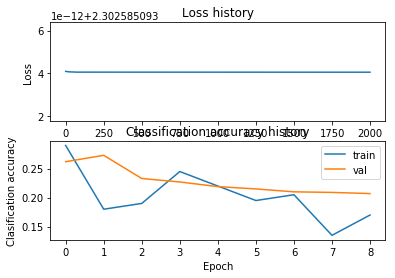

0.205


In [41]:
# Run your best neural net classifier on the test set. You should be able
# to get more than 55% accuracy.
print(best_hyperparam)
stats = best_net.train(X_train_feats, y_train, X_val_feats, y_val,
                       num_iters=2000, batch_size=200,
                       learning_rate=1e-2, #best_hyperparam['lr'],
                       learning_rate_decay=1, #best_hyperparam['lrd'],
                       reg=.9, #best_hyperparam['reg'],
                       verbose=True)
val_acc = (net.predict(X_val_feats) == y_val).mean()
print('Val Acc: ', val_acc)
print('Finished!')

# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.legend()
plt.show()

test_acc = (best_net.predict(X_test_feats) == y_test).mean()
print(test_acc)